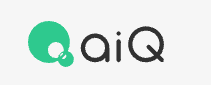

[disclaimer](./disclaimer.txt/)

# Illustrates how to load FACTSET Quants Factor Library (QFL) data
- Look up FACTSET quants factor symbols for a given factor name criterion.
- Load FACTSET quants factor data for a set of tickers or FACTSET symbols a user specify.

## `DAL`  Data Accessor Library 
> DAL access data from FACTSET database for QFL data

## Import ASR Data Accessor Library (DAL)

In [1]:
from aiq_strategy_robot.data.data_accessor import DAL
from aiq_strategy_robot.data.FACTSET.load_factset_quants_factor_list import load_factset_quants_factor_list
from aiq_strategy_robot.data.FACTSET.load_factset_quants_factor_data import load_factset_quants_factor_data

In [3]:
data_source='FACTSET'
handler = DAL()

## Step 1: List up factor names that match with factor group names or keyword.
- list all the factor names under a given factor group name (e.g. 'momentum', 'value', etc...).
- list all the factor names that contain `keyword` in their names.

### **`load_factset_quants_factor_list`**

#### Pattern 1: list by `factor_groups`

In [4]:
handler = load_factset_quants_factor_list(handler,  
    factor_groups=["momentum"]
)

df_qfl_list = handler.retrieve()
df_qfl_list.head()

,factor,name,factorGroup,sdfName,formula,tags,format
0,velocity63D,63D Velocity,Momentum,VELOCITY_63D,"QFL_VELOCITY(0,63D)","momentum,prices",double
1,stochastic63D,63D Stochastic Oscillator,Momentum,STOCHASTIC_63D,"QFL_STOCHASTIC(0,63D)","momentum,prices",double
2,retMom63D,63D Return Momentum,Momentum,RET_MOM_63D,"QFL_RET_MOM(0,63D)","momentum,prices",double
3,resRetMom63D,63D Residual Momentum,Momentum,RES_RET_MOM_63D,"QFL_RES_RET_MOM(0,63D)","momentum,prices",double
4,rsi63D,63D Relative Strength Index,Momentum,RSI_63D,"QFL_RSI(0,63D)","momentum,prices",double


### Data Access handler load
Load the data to memory

same return as **load_factset_quants_factor_list**
```
sdh = load_factset_quants_factor_list(handler,  
    factor_groups=["momentum"]
)
```



In [5]:
handler = handler.load(
    data_source,
    data_type='quants_factor_list',
    factor_groups="momentum"
)
df_qfl_list = handler.retrieve()
df_qfl_list.head()

,factor,name,factorGroup,sdfName,formula,tags,format
0,velocity63D,63D Velocity,Momentum,VELOCITY_63D,"QFL_VELOCITY(0,63D)","momentum,prices",double
1,stochastic63D,63D Stochastic Oscillator,Momentum,STOCHASTIC_63D,"QFL_STOCHASTIC(0,63D)","momentum,prices",double
2,retMom63D,63D Return Momentum,Momentum,RET_MOM_63D,"QFL_RET_MOM(0,63D)","momentum,prices",double
3,resRetMom63D,63D Residual Momentum,Momentum,RES_RET_MOM_63D,"QFL_RES_RET_MOM(0,63D)","momentum,prices",double
4,rsi63D,63D Relative Strength Index,Momentum,RSI_63D,"QFL_RSI(0,63D)","momentum,prices",double


#### Pattern 2: List by `keyword`

In [6]:
df_qfl_list = load_factset_quants_factor_list(
    handler,  
    keyword="momentum"
).retrieve()
df_qfl_list.head()

,factor,name,factorGroup,sdfName,formula,tags,format
888,retMom63D,63D Return Momentum,Momentum,RET_MOM_63D,"QFL_RET_MOM(0,63D)","momentum,prices",double
889,resRetMom63D,63D Residual Momentum,Momentum,RES_RET_MOM_63D,"QFL_RES_RET_MOM(0,63D)","momentum,prices",double
894,retMom60M,60M Return Momentum,Momentum,RET_MOM_60M,"QFL_RET_MOM(0,60M)","momentum,prices",double
895,resRetMom60M,60M Residual Momentum,Momentum,RES_RET_MOM_60M,"QFL_RES_RET_MOM(0,60M)","momentum,prices",double
901,retMom36M,36M Return Momentum,Momentum,RET_MOM_36M,"QFL_RET_MOM(0,36M)","momentum,prices",double


#### Caution: You can only input one of `factors` and `factset_groups`. An Error is thrown if both are specified.

In [7]:
# An error is thrown if you input both factors and factor_groups as follows.
handler = load_factset_quants_factor_list(
    handler,
    factors="retMom63D",
    factor_groups="Momentum",
    keyword="momentum",
)
handler.retrieve().head()


AssertionError: `factor` and `factor_group` cannot be set together. Use either one.

### Step 2: load QFL data with data_type = 'quants_factor_data'
> `list_tickers` or `list_symbols` must be specified when loading.

## Pattern 1: load all the factors for a given set of tickers
### **`load_factset_quants_factor_data`**

In [8]:
handler = load_factset_quants_factor_data(handler,  
    list_tickers=['4661-JP', '8305-JP'],
    list_factors=["retMom63D", "retMom63D", "resRetMom63D", "retMom36M"],
    start_datetime="2023-01-01",
    end_datetime="2024-02-01"
)

df_qfl_list = handler.retrieve()
df_qfl_list.head()

resRetMom63D  retMom36M  retMom63D
symbol   datetime                                      
NHXKSZ-R 2023-01-31      7.068491  48.294403   5.114639
         2023-02-28     10.039938  73.319640   6.617641
         2023-03-31     14.661753  64.471780  18.256771
         2023-04-28      8.927679  68.631424  11.292863
         2023-05-31     15.935314  67.973100  19.986237

### Data Access handler load
Load the data to memory

same return as **load_factset_quants_factor_data**
```
handler = load_factset_quants_factor_data(handler,  
    list_tickers=['4661-JP', '8305-JP'],
    list_factors=["retMom63D", "retMom63D", "resRetMom63D", "retMom36M"],
    start_datetime="2023-01-01",
    end_datetime="2024-02-01"
)

```

In [9]:
# `data_type` must be 'quants_factor_data'
handler = handler.load(
    data_source,
    data_type='quants_factor_data',
    list_tickers=['4661-JP', '8305-JP'],
    list_factors=["retMom63D", "retMom63D", "resRetMom63D", "retMom36M"],
    start_datetime="2023-01-01",
    end_datetime="2024-02-01"
)
handler.retrieve().head()

resRetMom63D  retMom36M  retMom63D
symbol   datetime                                      
NHXKSZ-R 2023-01-31      7.068491  48.294403   5.114639
         2023-02-28     10.039938  73.319640   6.617641
         2023-03-31     14.661753  64.471780  18.256771
         2023-04-28      8.927679  68.631424  11.292863
         2023-05-31     15.935314  67.973100  19.986237

### Pattern 2: Look up FSYM_ID from list factors and tickers
- You can also specify instruments by list_symbols (FSYM_ID), instead of list_tickers.
- First FACTSET symbols must be found as users usually only know ticker codes.

In [10]:
handler = handler.load(
    data_source,
    data_type='symbol_lookup',
    ticker=['4661-JP', '8035-JP'],
    pick_only_primary=True
)
handler.retrieve().head()

,FSYM_ID,FSYM_SECURITY_ID,FACTSET_ENTITY_ID,TICKER,COMPANY_NAME,EXCHANGE_CODE,CURRENCY,FIGI,BBG_TICKER
0,BS0GWP-R,VPX5WF-S,05HWCG-E,8035-JP,Tokyo Electron Ltd.,TKS,JPY,BBG000BB59S7,8035 JP
1,BS0GWP-R,VPX5WF-S,05HWCG-E,8035-JP,Tokyo Electron Ltd.,None,None,BBG000BB59S7,8035 JP
3,NHXKSZ-R,SJSHJR-S,05HWDS-E,4661-JP,"Oriental Land Co., Ltd.",TKS,JPY,BBG000HPZ1T3,4661 JP
4,NHXKSZ-R,SJSHJR-S,05HWDS-E,4661-JP,"Oriental Land Co., Ltd.",None,None,BBG000HPZ1T3,4661 JP


In [11]:
# Use `FSYM_ID` found in the previous step.
handler = load_factset_quants_factor_data(
    handler,
    list_symbols=['NHXKSZ-R', 'BS0GWP-R'],
    list_factors=["retMom63D", "retMom63D", "resRetMom63D", "retMom36M"],
    start_datetime="2023-01-01",
    end_datetime="2023-12-01"
)
handler.retrieve().head()

,,resRetMom63D,retMom36M,retMom63D
symbol,datetime,,,
NHXKSZ-R,2023-01-31,7.068491,48.294403,5.114639
BS0GWP-R,2023-01-31,12.636841,105.315254,17.802929
NHXKSZ-R,2023-02-28,10.039938,73.319640,6.617641
BS0GWP-R,2023-02-28,-0.823361,112.666110,3.947663
NHXKSZ-R,2023-03-31,14.661753,64.471780,18.256771


### Pattern 3: Specify `freq` to get timeseries of desired intervals.
> `freq` can be selected from "d" (daily), "w" (weekly), "m" (monthly), "am", "cq", "ay" and "cy".

In [12]:
load_factset_quants_factor_data(
    handler,
    list_tickers="AAPL-US",
    list_factors="ebitMgnFwdChg3Yr",
    freq="W",  # ["D", "W", "M", "AM", "CQ", "AY", "CY"]
    start_datetime="2023-01-01",
    end_datetime="2023-02-01"
).retrieve().head()

ebitMgnFwdChg3Yr
symbol   datetime                    
MH33D6-R 2022-12-30         -1.432398
         2023-01-06         -1.472384
         2023-01-13         -1.472864
         2023-01-20         -1.519259
         2023-01-27         -1.310662

#### Caution: An error is thrown if you do not follow the rules below:
- 'list_factors' must be provided.
- Both 'list_tickers' and 'list_symbols' must not be input at the same time

#### Case 1: `list_factors` is null.

In [13]:
handler = load_factset_quants_factor_data(
    handler,
    list_tickers="AAPL-US",
    freq="D",
    start_datetime="2023-01-01",
    end_datetime="2023-02-01"
)
handler.retrieve().head()

ValidationError: list_factors: null value not allowed

#### case 2: list_tickers and list_symbols are provided.

In [14]:
load_factset_quants_factor_data(
    handler,
    list_symbols="MH33D6-R",
    list_tickers="AAPL-US",
    list_factors="ebitMgnFwdChg3Yr",
    freq="D",
    start_datetime="2023-01-01",
    end_datetime="2023-02-01"
)
handler.retrieve().head()

ValueError: Please specify only one of the following: list_tickers or list_symbols.